# Lib import

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from matplotlib import cm

# Скачивание предобработанного датасета

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Data/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Data


In [ ]:
filename = 'Data_Processed.csv'c
df = pd.read_csv(filename)
df = df.drop(columns='Unnamed: 0')

Исправление неопознанного бага с символом `s` в столбце `M1 TED (W)`:

In [ ]:
import string

for row_index in range(0, df.shape[0]):
    for char in list(string.ascii_lowercase):
        if type(df.iloc[row_index]) == str:
            if char in df.iloc[row_index, 17]:
                df.iloc[row_index, 17] = df.iloc[row_index, 17][1:]
                print('Gotcha, damn bug!')
            else:
                print("What the hell?")

# Распределение входных параметров во всем датасете

Вытаскиваем все названия колонок входных параметров:

In [ ]:
col_names = list(df.columns)
print(col_names)

['Beam length (um)', 'Beam width (nm)', 'Thickness_1 (nm)', 'Thickness_2 (nm)', 'Temperature (K)', 'Distance (nm)', 'Voltage (V)', 'M1 Eigenfrequency (Hz)', 'M1 Quality factor', 'M1 Displacement mag (nm)', 'M1 Displacement RMS (nm)', 'M1 Vel mag (m/s)', 'M1 Vel mag RMS (m/s)', 'M1 Acc mag (m/s^2)', 'M1 Acc RMS (m/s^2)', 'M1 Effective mass (kg)', 'M1 Noise (kg^2/s^3)', 'M1 TED (W)', 'M2 Eigenfrequency (Hz)', 'M2 Quality factor', 'M2 Displacement mag (nm)', 'M2 Displacement RMS (nm)', 'M2 Vel mag (m/s)', 'M2 Vel mag RMS (m/s)', 'M2 Acc mag (m/s^2)', 'M2 Acc RMS (m/s^2)', 'M2 Effective mass (kg)', 'M2 Noise (kg^2/s^3)', 'M2 TED (W)', 'M3 Eigenfrequency (Hz)', 'M3 Quality factor', 'M3 Displacement mag (nm)', 'M3 Displacement RMS (nm)', 'M3 Vel mag (m/s)', 'M3 Vel mag RMS (m/s)', 'M3 Acc mag (m/s^2)', 'M3 Acc RMS (m/s^2)', 'M3 Effective mass (kg)', 'M3 Noise (kg^2/s^3)', 'M3 TED (W)', 'M4 Eigenfrequency (Hz)', 'M4 Quality factor', 'M4 Displacement mag (nm)', 'M4 Displacement RMS (nm)', 'M4 

Функция для визуализации распределений:

In [ ]:
def plot_distribution(df, indices_to_plot: list, col_names, log_scale):
    fig, ax = plt.subplots(nrows=1, ncols=len(indices_to_plot), figsize=(5 * len(indices_to_plot), 5))
    for j in range(0, len(indices_to_plot)):
        sns.histplot(df.iloc[:, indices_to_plot[j]], ax=ax[j], log_scale=log_scale)
        ax[j].set_title(f"{col_names[indices_to_plot[j]]} distribution.", fontsize=2 * (len(indices_to_plot) + 1))
        ax[j].set_xlabel(col_names[indices_to_plot[j]])
        ax[j].set_ylabel('Count')
    plt.show()

Распределение длины, ширины и толщин нанопровода в датасете:

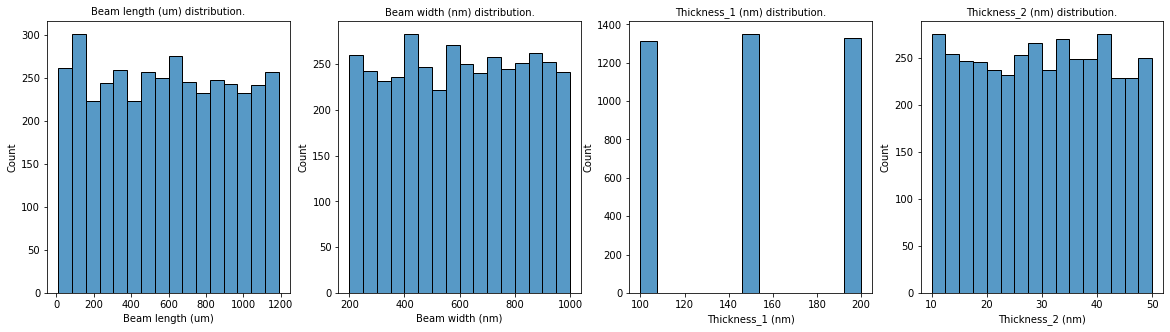

In [ ]:
plot_distribution(df, indices_to_plot=[0, 1, 2, 3], col_names=col_names, log_scale=False)

Распределение температуры (низкий и высокий пределы), расстояния от затвора до нанопровода и напряжения на затворе. Два распределения температуры: 
$$ T \in U(0, 6) \; \text{or} \; U(0, 300)$$

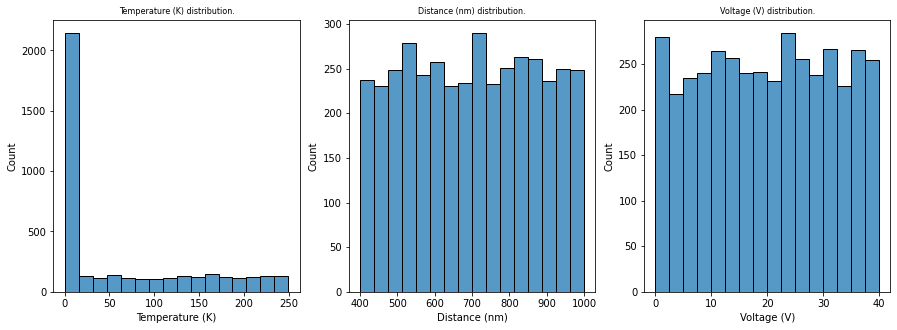

In [ ]:
plot_distribution(df, indices_to_plot=[4, 5, 6], col_names=col_names, log_scale=False)

Функция, которая сортирует весь датасет по температурным диапазонам $0 \; K \le T \le 6 \; K$ и $6 \; K \le T \le  300 \; K$

In [ ]:
def sort_by_temperature(df, threshold):
    mask = df['Temperature (K)'] <= 6
    return df[mask], df[~mask]

Функция визуализации распределения температуры:

In [ ]:
def plot_temperature(df, temp_index, col_names):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    df_low, df_high = sort_by_temperature(df=df, threshold=6)
    for j in range(0, 2):
        if j == 0:
            sns.histplot(df_low.iloc[:, temp_index], ax=ax[j])
        else:
            sns.histplot(df_high.iloc[:, temp_index], ax=ax[j])
        ax[j].set_title(f"{col_names[temp_index]} distribution.", fontsize=4)
        ax[j].set_xlabel(col_names[temp_index])
        ax[j].set_ylabel('Count')
    plt.show()

Распределение температуры:

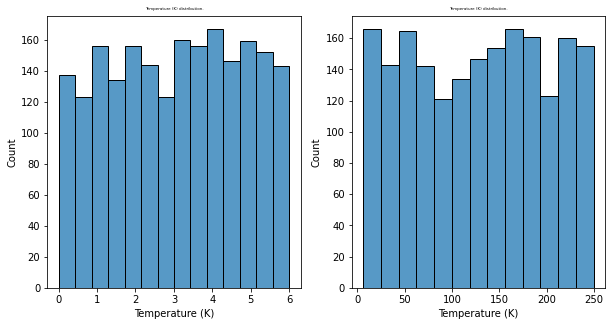

In [ ]:
plot_temperature(df=df, temp_index=4, col_names=col_names)

# Распределение выходных параметров во всем датасете для каждой моды в отдельности

Здесь приведены распределения резонансной частоты, добротности, эффективной массы и термоупругих потерь для всего датасета.

Распределение резонансных частот по модам (**atencio:** логарифмический масштаб):

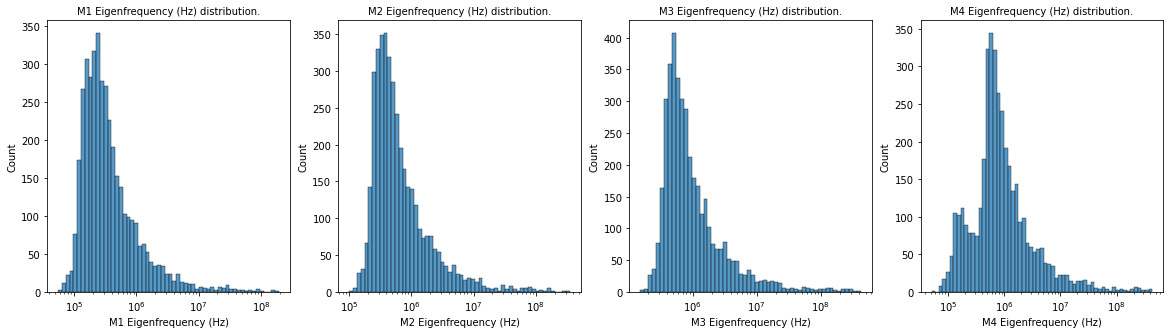

In [ ]:
plot_distribution(df, indices_to_plot=[7, 18, 29, 40], col_names=col_names, log_scale=True)

Распределение добротностей по модам. Комментарий: наблюдаем аномалию на 3-ей и 4-ой модах?

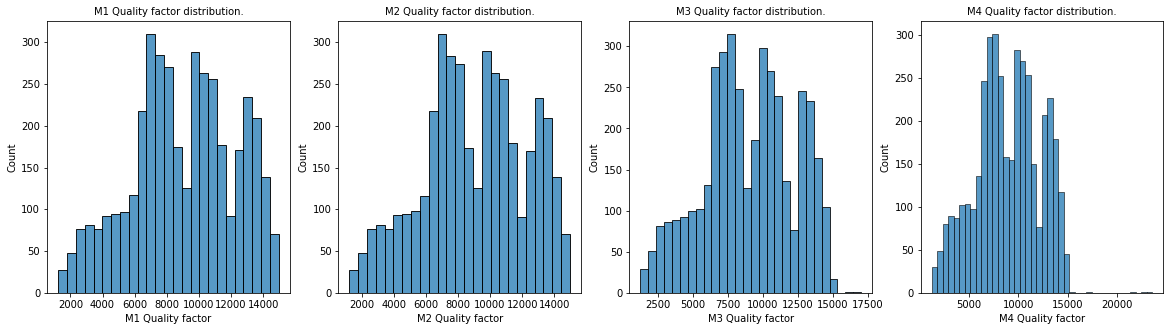

In [ ]:
plot_distribution(df, indices_to_plot=[8, 19, 30, 41], col_names=col_names, log_scale=False)

Распределение эффективной массы по модам:

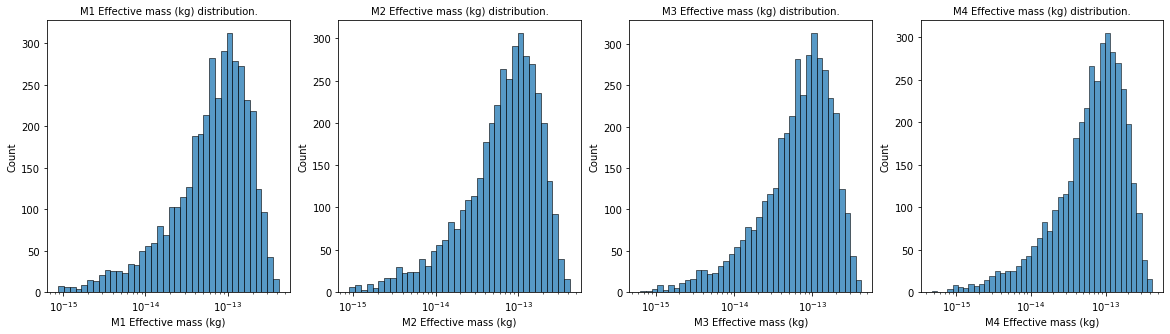

In [ ]:
plot_distribution(df, indices_to_plot=[15, 26, 37, 48], col_names=col_names, log_scale=True)

Распределение термоупругих потерь по модам:

In [ ]:
df['M1 TED (W)'].describe()
print(df.iloc[2, 17])

5.424000403695109e-14


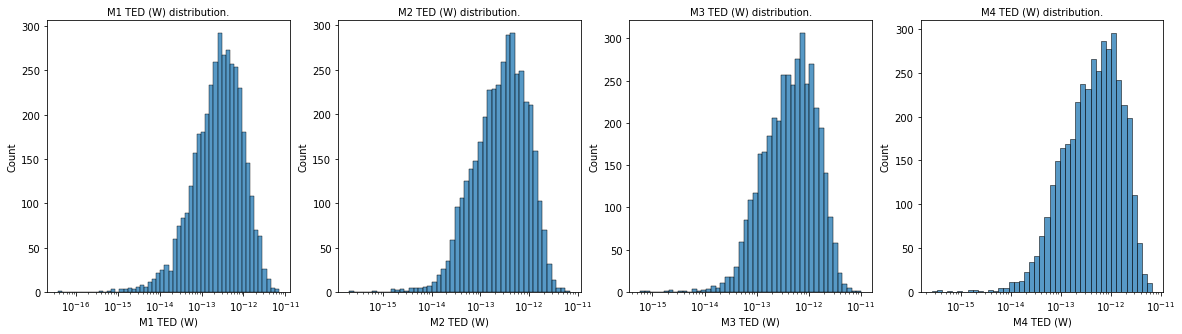

In [ ]:
plot_distribution(df, indices_to_plot=[17, 28, 39, 50], col_names=col_names, log_scale=True)

# Распределение выходных параметров для всех мод